In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host = 'localhost',
    user ='root',
    password = 'anmol2004',
    database = 'ecommerce'
)
cursor = db.cursor(buffered=True)

In [4]:
# List all unique cities where customers are located.

# Execute query
query = """SELECT DISTINCT customer_city FROM customers"""
cursor.execute(query)

# Fetch all results
data = cursor.fetchall()

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Customer City"])

# Print as a table
print(df)





              Customer City
0                    franca
1     sao bernardo do campo
2                 sao paulo
3           mogi das cruzes
4                  campinas
...                     ...
4114                 siriji
4115    natividade da serra
4116           monte bonito
4117             sao rafael
4118      eugenio de castro

[4119 rows x 1 columns]


In [5]:
# Count the number of orders placed in 2017.

query = """SELECT COUNT(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2017"""
cursor.execute(query)

# Fetch the result
data = cursor.fetchone()  # COUNT returns a single value

# Print the count
print("Total Orders in 2017:", data[0])


Total Orders in 2017: 45101


In [6]:
# Find the total sales per category.

query = """
    SELECT 
        products.product_category AS category, 
        SUM(payments.payment_value) AS sales
    FROM products 
    JOIN order_items ON products.product_id = order_items.product_id
    JOIN payments ON order_items.order_id = payments.order_id  -- Fix table name
    GROUP BY category
"""
cursor.execute(query)
data = cursor.fetchall()

# Print results in a readable format
df = pd.DataFrame(data, columns=["Category", "Total Sales"])
print(df)


                       Category   Total Sales
0                     perfumery  5.067387e+05
1          Furniture Decoration  1.430176e+06
2                     telephony  4.868821e+05
3                bed table bath  1.712554e+06
4                    automotive  8.522943e+05
..                          ...           ...
69               cds music dvds  1.199430e+03
70                   La Cuisine  2.913530e+03
71  Fashion Children's Clothing  7.856700e+02
72                     PC Gamer  2.174430e+03
73       insurance and services  3.245100e+02

[74 rows x 2 columns]


In [7]:
# Calculate the percentage of orders that were paid in installments.

query = """
    SELECT 
        (SUM(CASE WHEN payment_installments > 1 THEN 1 ELSE 0 END) / COUNT(*)) * 100 
        AS installment_percentage
    FROM payments;
"""
cursor.execute(query)
data = cursor.fetchone()

# Print the percentage
print("Percentage of Orders Paid in Installments:", data[0], "%")



Percentage of Orders Paid in Installments: 49.4176 %


   State  Customer Count
0     SP           41746
1     RJ           12852
2     MG           11635
3     RS            5466
4     PR            5045
5     SC            3637
6     BA            3380
7     DF            2140
8     ES            2033
9     GO            2020
10    PE            1652
11    CE            1336
12    PA             975
13    MT             907
14    MA             747
15    MS             715
16    PB             536
17    PI             495
18    RN             485
19    AL             413
20    SE             350
21    TO             280
22    RO             253
23    AM             148
24    AC              81
25    AP              68
26    RR              46


<function matplotlib.pyplot.show(close=None, block=None)>

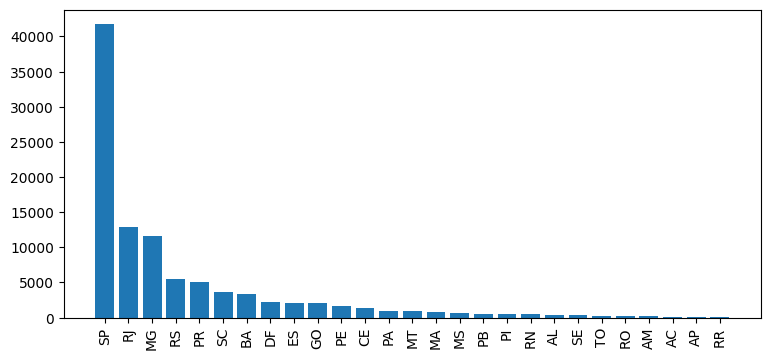

In [8]:
# Count the number of customers from each state. 

query = """
    SELECT customer_state, COUNT(customer_id) AS customer_count
    FROM customers
    GROUP BY customer_state
    ORDER BY customer_count DESC;
"""
cursor.execute(query)
data = cursor.fetchall()

# Display results in a readable format using Pandas
df = pd.DataFrame(data, columns=["State", "Customer Count"])
print(df)
df = df.sort_values(by= "Customer Count", ascending = False)

plt.figure(figsize=(9,4))
plt.bar(df["State"] ,df ["Customer Count"])
plt.xticks(rotation = 90)
plt.show


       Month  Order Count
0       July         6292
1     August         6512
2   February         6728
3       June         6167
4      March         7211
5    January         7269
6        May         6873
7      April         6939
8  September           16
9    October            4


AttributeError: 'Axes' object has no attribute 'container'

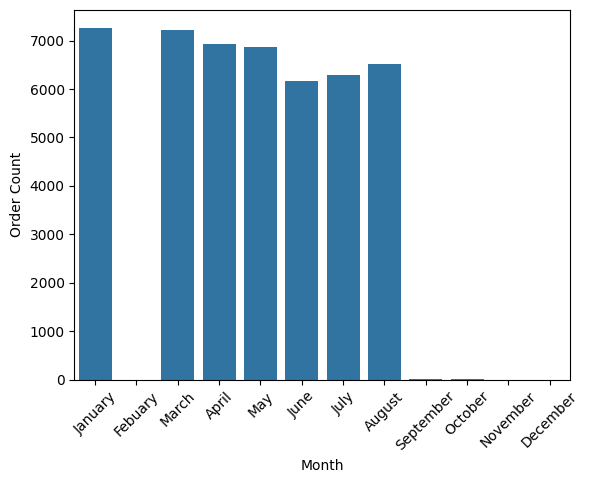

In [ ]:
# Calculate the number of orders per month in 2018.
query = """
    select monthname(order_purchase_timestamp) months, count(order_id) order_count
    from orders where year(order_purchase_timestamp) = 2018
    group by months
"""
cursor.execute(query)
data = cursor.fetchall()

# Display results in a readable format using Pandas
df = pd.DataFrame(data, columns=["Month", "Order Count"])
print(df)
# Assuming df has columns 'Month' and 'Order Count'
ax = sns.barplot(x=df["Month"], y=df["Order Count"], data=df, order=o)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])

plt.show()




In [10]:
# Find the average number of products per order, grouped by customer city.
query = """
    SELECT 
        c.customer_city, 
        AVG(order_product_counts.product_count) AS avg_products_per_order
    FROM (
        SELECT 
            o.customer_id, 
            o.order_id, 
            COUNT(oi.product_id) AS product_count
        FROM orders o
        JOIN order_items oi ON o.order_id = oi.order_id
        GROUP BY o.order_id, o.customer_id
    ) AS order_product_counts
    JOIN customers c ON order_product_counts.customer_id = c.customer_id
    GROUP BY c.customer_city
    ORDER BY avg_products_per_order DESC;
"""
cursor.execute(query)
data = cursor.fetchall()

# Display results in a readable format using Pandas

df = pd.DataFrame(data, columns=["Customer City", "Avg Products per Order"])
print(df)



             Customer City Avg Products per Order
0           padre carvalho                 7.0000
1              celso ramos                 6.5000
2            candido godoi                 6.0000
3                    datas                 6.0000
4           matias olimpio                 5.0000
...                    ...                    ...
4105        sebastiao leal                 1.0000
4106  morro agudo de goias                 1.0000
4107        santa filomena                 1.0000
4108            guamiranga                 1.0000
4109         padre paraiso                 1.0000

[4110 rows x 2 columns]


In [11]:
# Calculate the percentage of total revenue contributed by each product category.
# SQL query to get revenue percentage per product category
query = """
    SELECT 
        product_category_name, 
        SUM(price) AS total_revenue, 
        (SUM(price) / (SELECT SUM(price) FROM orders)) * 100 AS revenue_percentage
    FROM orders
    JOIN products ON orders.product_id = products.product_id
    GROUP BY product_category_name
    ORDER BY total_revenue DESC;
"""

cursor.execute(query)
data = cursor.fetchall()

# Close the cursor and connection
cursor.close()
conn.close()

# Convert data to a Pandas DataFrame
df = pd.DataFrame(data, columns=["Product Category", "Total Revenue", "Revenue Percentage"])
df["Revenue Percentage"] = df["Revenue Percentage"].round(2)  # Round for better readability

# Display the result
print(df)




ProgrammingError: 1054 (42S22): Unknown column 'product_category_name' in 'field list'